In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.regression.quantile_regression as Q_reg
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing_data = pd.read_csv("housing_dataset.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


About Dataset:

**longitude:** A measure of how far west a house is; a higher value is farther west

**latitude:** A measure of how far north a house is; a higher value is farther north

**housingMedianAge:** Median age of a house within a block; a lower number is a newer building

**totalRooms:** Total number of rooms within a block

**totalBedrooms:** Total number of bedrooms within a block

**population:** Total number of people residing within a block

**households:** Total number of households, a group of people residing within a home unit, for a block

**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

**medianHouseValue:** Median house value for households within a block (measured in US Dollars)

**oceanProximity:** Location of the house w.r.t ocean/sea

In [3]:
housing_data.shape

(20640, 10)

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


There are total 20,640 instance in the dataset  

total_bedrooms has 20,433 only, the rest 207 is null values

ocean_proximity is categorical variable

**Missing Values**

In [5]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**Statistical Information**

In [6]:
housing_data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


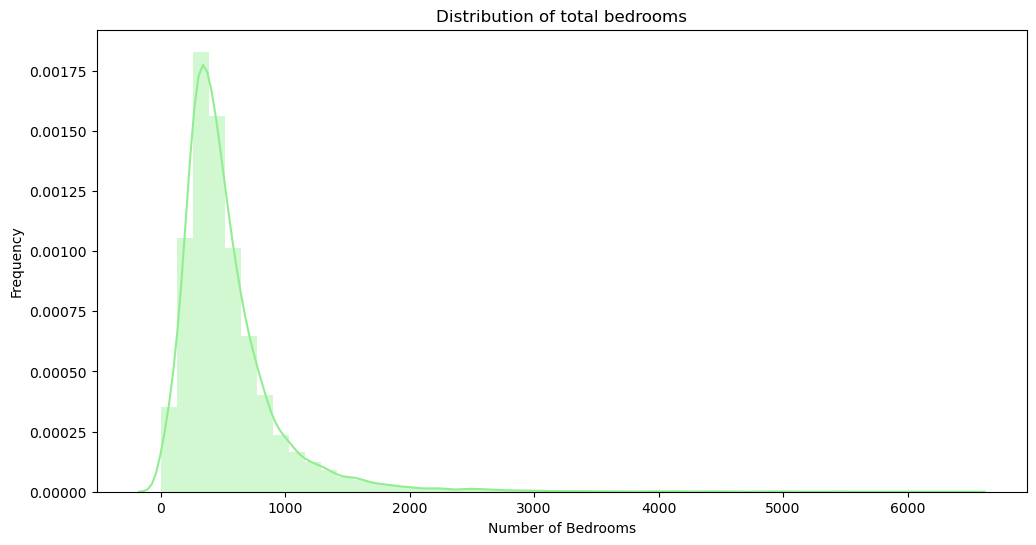

In [7]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['total_bedrooms'], color = 'lightgreen')
plt.title('Distribution of total bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

total_bedrooms is positively skewed, thus we will use the median to fill null values because it works best for skewed distributions and the mean is sensitive to data skewness.

In [8]:
housing_data['total_bedrooms'].fillna(value = housing_data['total_bedrooms'].median(), inplace = True)

In [9]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

No more null values in total_bedrooms.

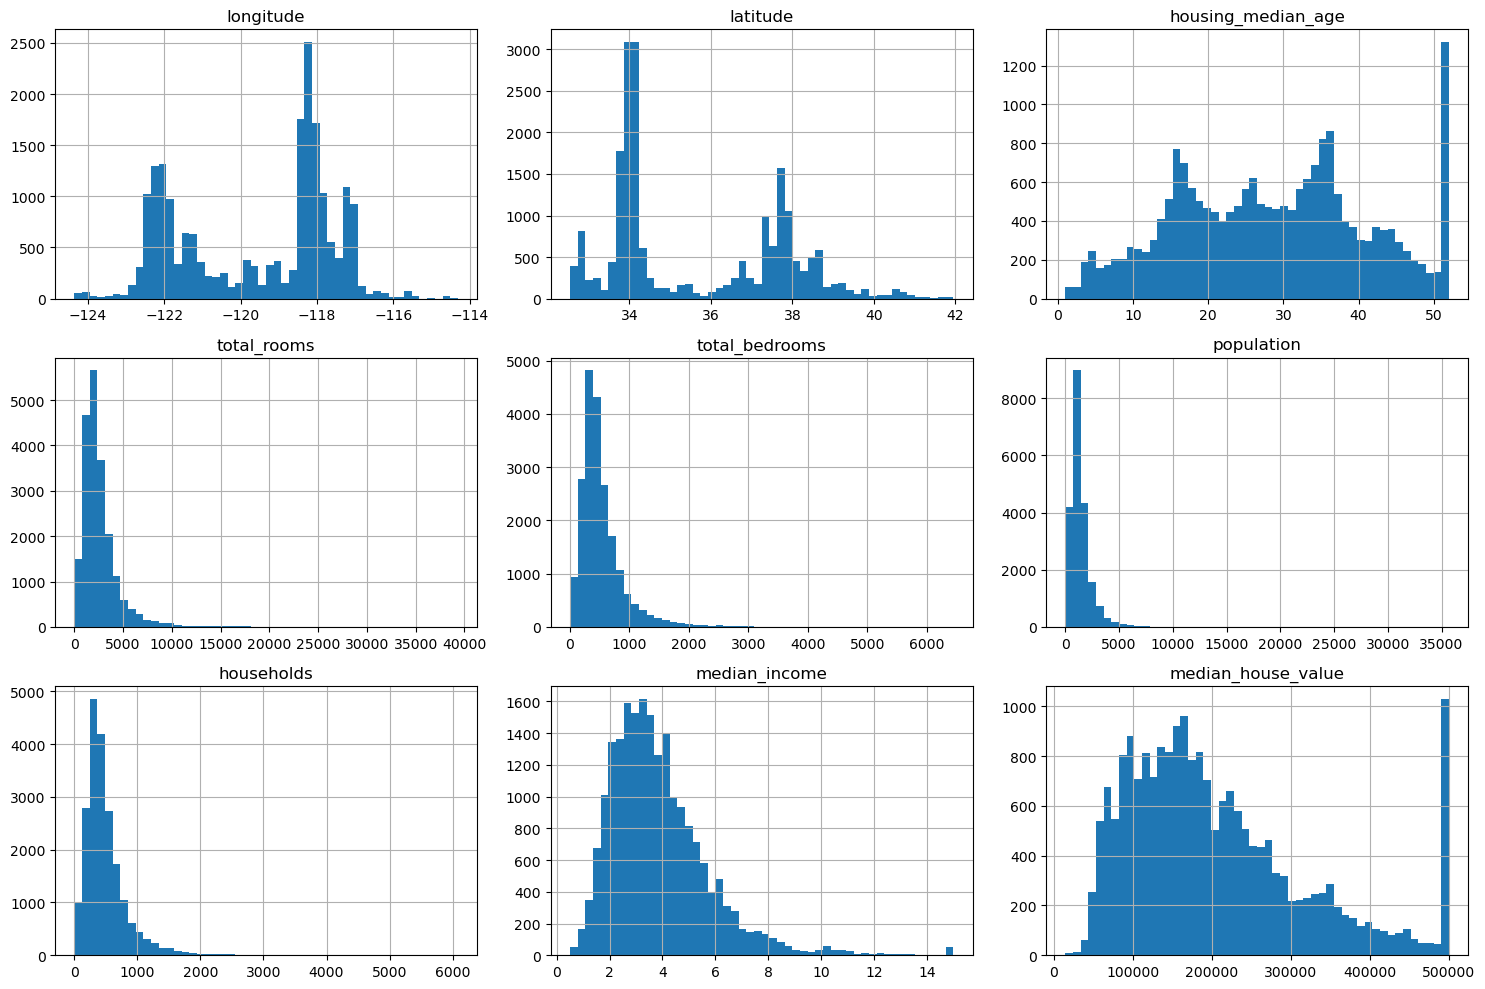

In [10]:
housing_data.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

The median age of houses is mostly between 15 to 37 years.

**Distribution of Median Income**

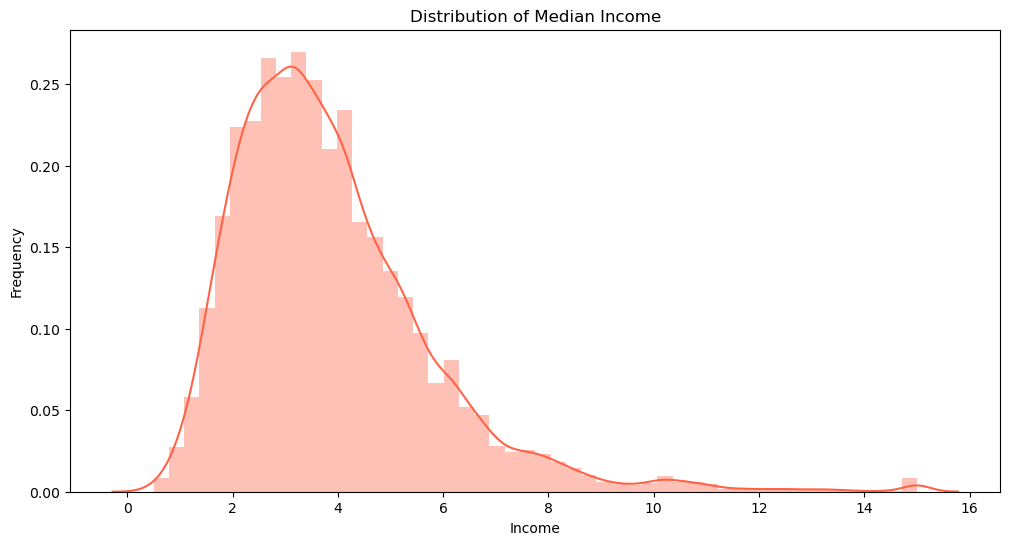

In [11]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['median_income'], color = 'tomato')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

It's a positively skewed distribution. The plot demonstrates that the majority of people have income within the same range, with only a few who are on the further side.

**Categorical Variable: Ocean Proximity**

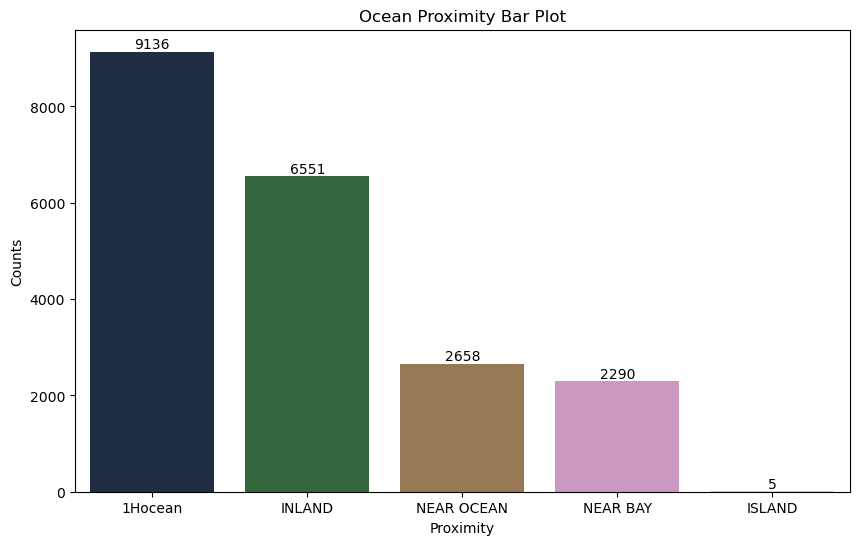

In [12]:
# Change '<1H OCEAN' to '1Hocean' in the 'ocean_proximity' column
# Replace '<1H OCEAN' with '1Hocean'
housing_data['ocean_proximity'] = housing_data['ocean_proximity'].replace('<1H OCEAN', '1Hocean')

# Verify the change
housing_data['ocean_proximity'].unique()

# Get value counts for 'ocean_proximity'
ocean_proximity_counts = housing_data['ocean_proximity'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=ocean_proximity_counts.index, y=ocean_proximity_counts.values,palette = "cubehelix")

# Add counts on top of the bars
for index, value in enumerate(ocean_proximity_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Proximity')
plt.ylabel('Counts')
plt.title('Ocean Proximity Bar Plot')

# Show the plot
plt.show()

Five unique values are present in ocean_proximity variable.

**Plotting Median house value vs Median Income**

Text(0.5, 0, 'Median Income')

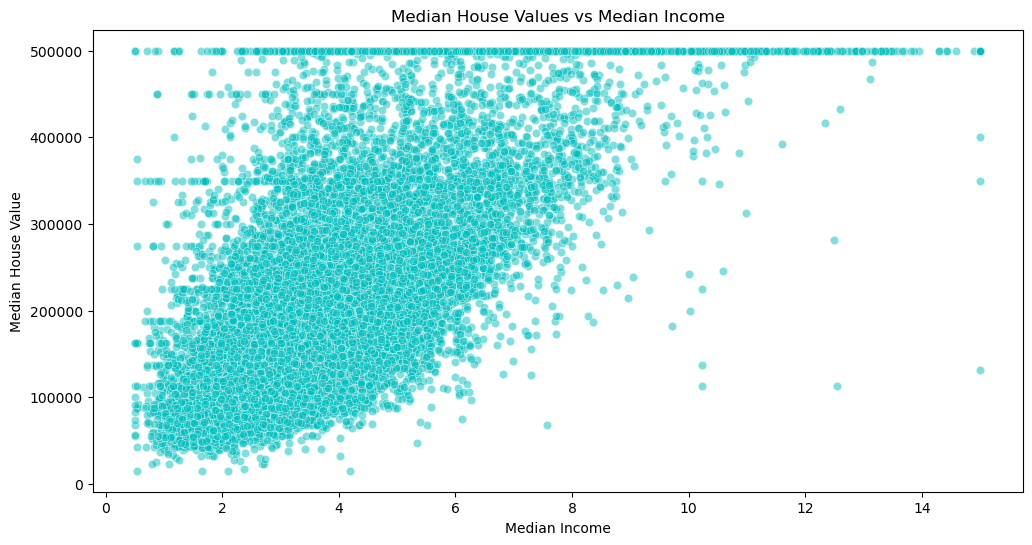

In [13]:
plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income")
sns.scatterplot(data = housing_data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'c')
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

We can see that the maximum house value was clearly fixed at $500,000, and any houses more expensive than that received this sum. These records should be removed because they contain an incorrect target value and could affect the algorithm.

There are horizontal lines at specific positions, including 450000, 350000, and 275000. It looks very unnatural, and these values were probably misplaced.

**Removing horizontal lines at specific positions**

**Correlation Matrix and Heatmap**

In [14]:
#housing_data2=housing_data.iloc[:,:-1]
housing_data2 = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=False)


<Axes: >

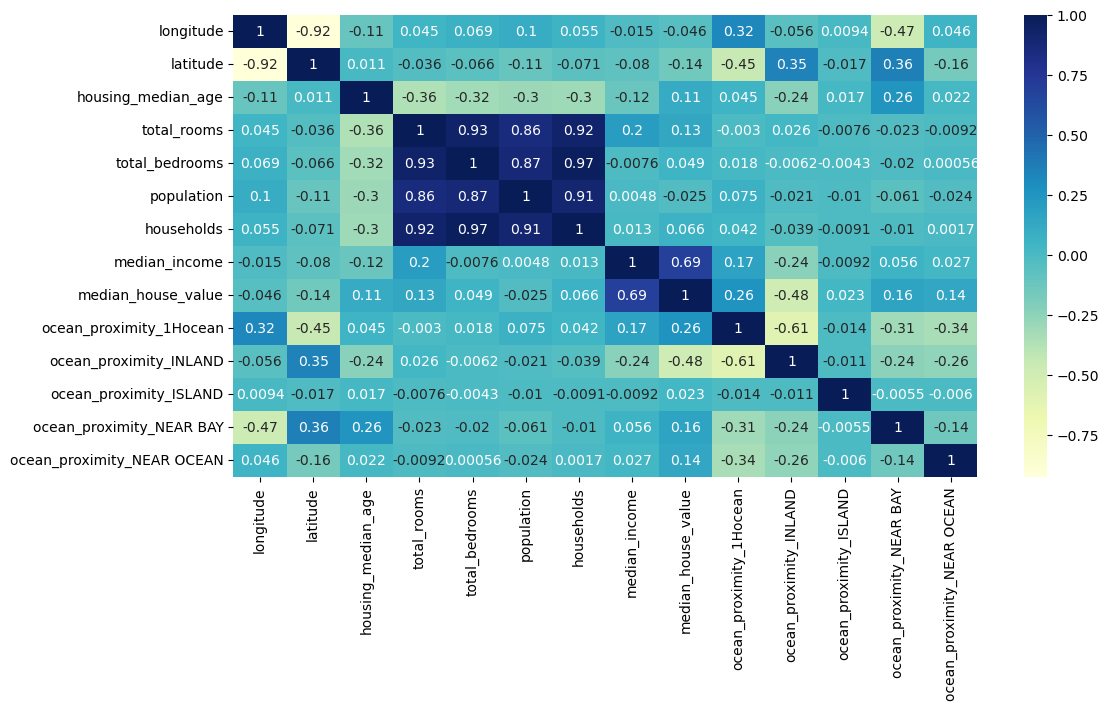

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(housing_data2.corr(), annot=True, cmap="YlGnBu")

**Ocean Proximity vs Median house value**

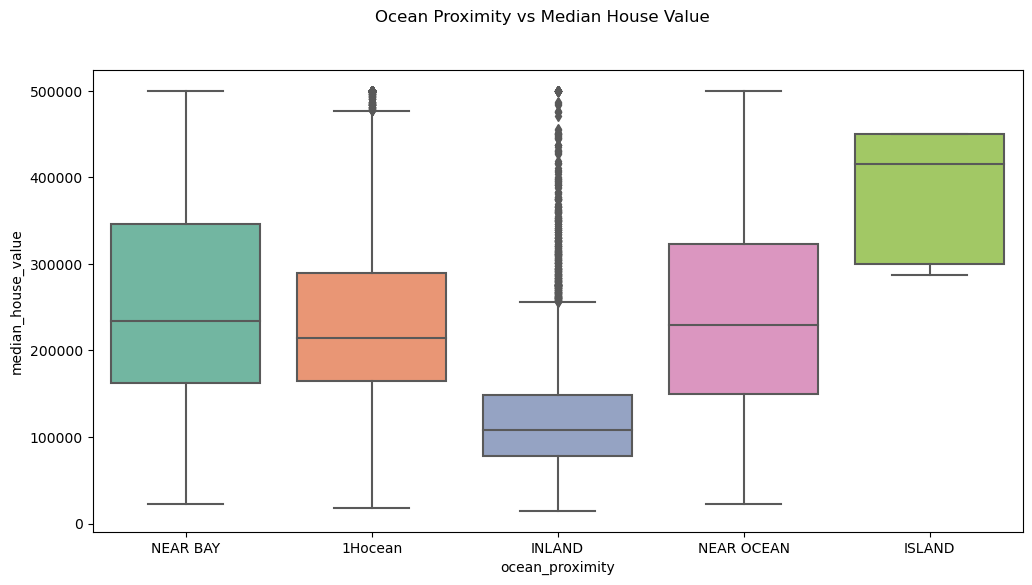

In [16]:

plt.figure(figsize = (12,6))

plt.suptitle('Ocean Proximity vs Median House Value')
sns.boxplot(data=housing_data, x="ocean_proximity", y="median_house_value", palette="Set2")

plt.show()

Houses in the "near_bay", "near_ocean", and "<1H ocean" categories are more expensive than those in the inland. Furthermore, these categories have a wider range of prices.

**Extracting useful features from the present variables**

In [17]:
data = housing_data
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_household"] = data["population"]/data["households"]

In [18]:
data[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000
mean,5.429000,1.100910,3.070655
std,2.474173,0.519159,10.386050
min,0.846154,0.121204,0.692308
25%,4.440716,1.005525,2.429741
50%,5.229129,1.048860,2.818116
75%,6.052381,1.100015,3.282261
max,141.909091,34.066667,1243.333333


In [19]:
data = data.drop(['total_rooms','total_bedrooms','population', 'households'], axis = 1)
data.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41,8.3252,NEAR BAY,452600,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,NEAR BAY,358500,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,NEAR BAY,352100,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,NEAR BAY,341300,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,NEAR BAY,342200,6.281853,1.081081,2.181467


As the 'ISLAND' in ocean proximity has little instances, we are dropping it from dataset.

In [20]:
data = data.loc[data['ocean_proximity'] != 'ISLAND'].reset_index(drop=True)

In [21]:
data['ocean_proximity'].value_counts()

ocean_proximity
1Hocean       9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

**Encoding Categorical Variable - Ocean Proximity**

In [22]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(data[['ocean_proximity']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

df = data.join(encoded_df)
df.reset_index(drop=True, inplace=True)

In [23]:
df = df.drop(['ocean_proximity'], axis = 1)

In [24]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_1Hocean,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,8.3252,452600,6.984127,1.023810,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,8.3014,358500,6.238137,0.971880,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,7.2574,352100,8.288136,1.073446,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,5.6431,341300,5.817352,1.073059,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,3.8462,342200,6.281853,1.081081,2.181467,0.0,0.0,1.0,0.0


<Axes: >

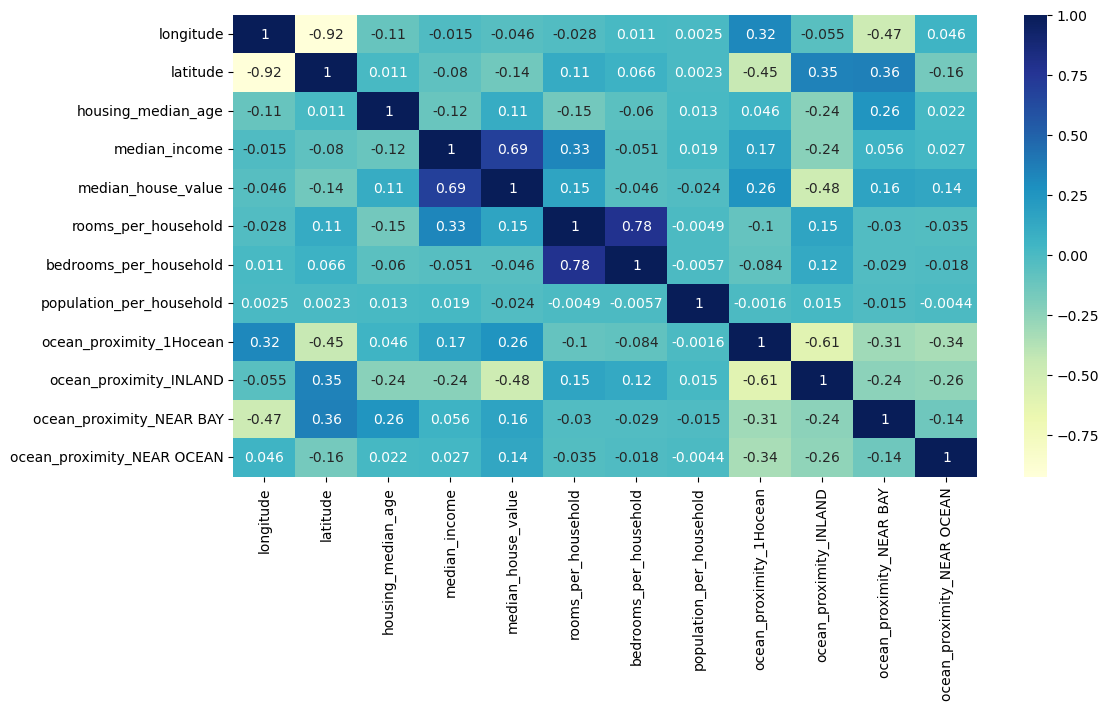

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Data is ready to be split into train and test to train our models.

**Splitting Data**

In [26]:
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [27]:
X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X.columns]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
continuous_features = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household',	'bedrooms_per_household',	'population_per_household']

**Scaling Data**

In [30]:
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [31]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (15476, 11)
X_test shape is  (5159, 11)
y_train shape is  (15476,)
y_test shape is  (5159,)


**1. Quantile Regression**

In [32]:
quantiles = [0.01, 0.1, 0.5, 0.95, 0.99]

In [33]:
def Qreg(q, X_train, y_train, X_test):
    qr_model = sm.QuantReg(y_train, X_train).fit(q=q)

    coefs = pd.DataFrame()
    coefs['param'] = qr_model.params
    coefs = pd.concat([coefs, qr_model.conf_int()], axis=1)
    coefs['q'] = q
    coefs.columns = ['beta', 'beta_lower', 'beta_upper', 'quantile']

    pred = pd.Series(qr_model.predict(X_test).round(2))
    return qr_model, coefs, pred



---


Quantile Regression Summary of each quantile


---



In [34]:
qr_coefs = pd.DataFrame()
qr_actual_prediction = pd.DataFrame()

for q in quantiles:
    model, coefs, pred = Qreg(q, X_train, y_train, X_test)
    qr_coefs = pd.concat([qr_coefs, coefs])
    qr_actual_prediction = pd.concat([qr_actual_prediction, pred], axis=1)

    print(f"\nQuantile: {q}\n")
    print(model.summary())


Quantile: 0.01

                         QuantReg Regression Results                          
Dep. Variable:     median_house_value   Pseudo R-squared:               0.2350
Model:                       QuantReg   Bandwidth:                   1.551e+04
Method:                 Least Squares   Sparsity:                    9.979e+05
Date:                Sun, 25 Aug 2024   No. Observations:                15476
Time:                        12:16:32   Df Residuals:                    15465
                                        Df Model:                           10
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                  -1.135e+04   4122.507     -2.753      0.006   -1.94e+04   -3269.461
latitude                   -1.307e+04   4446.270     -2.940      0.003   -2.18e+04   -4356.352
housing_median_age           997.2829    988.684  



---


Coefficient Estimates


---



In [35]:
qr_coefs

,beta,beta_lower,beta_upper,quantile
longitude,-11350.058456,-19430.656200,-3269.460711,0.01
latitude,-13071.563510,-21786.774807,-4356.352213,0.01
housing_median_age,997.282884,-940.653006,2935.218775,0.01
median_income,38874.596146,35354.547245,42394.645047,0.01
rooms_per_household,10172.845680,5254.520099,15091.171261,0.01
bedrooms_per_household,-9056.061568,-13047.998997,-5064.124139,0.01
population_per_household,-18761.653141,-19123.346729,-18399.959553,0.01
ocean_proximity_1Hocean,110665.954653,107293.154330,114038.754976,0.01
ocean_proximity_INLAND,75974.840918,70716.885033,81232.796803,0.01
ocean_proximity_NEAR BAY,107175.779302,101116.410608,113235.147996,0.01




---


Quantile Regression Predictions with Intervals


---



In [36]:
qr_actual_prediction.columns = quantiles
qr_actual_prediction['actual'] = y_test
qr_actual_prediction['interval'] = qr_actual_prediction[0.99] - qr_actual_prediction[0.01]
qr_actual_prediction = qr_actual_prediction.sort_values('interval').reset_index(drop=True)
qr_actual_prediction

,0.01,0.1,0.5,0.95,0.99,actual,interval
0,61186.14,50902.47,43464.19,39816.84,59337.01,85900,-1849.13
1,7714.67,-3595.13,5122.28,53179.49,33459.32,56100,25744.65
2,13783.46,5063.32,14725.32,47464.51,50136.84,34600,36353.38
3,5105.01,-4228.31,9617.97,49073.93,42914.81,47500,37809.80
4,21113.47,21112.40,40968.35,79756.97,98121.24,58600,77007.77
...,...,...,...,...,...,...,...
5154,563.77,137661.96,408951.90,859399.01,862627.19,193800,862063.42
5155,-15835.13,16710.91,272027.08,846408.13,995660.42,87500,1011495.55
5156,-53858.48,151881.34,516871.00,1069693.55,1047239.74,125000,1101098.22
5157,-69641.85,186142.22,1056263.60,2555933.65,2515797.63,162500,2585439.48




---


Quantile Regression Model Training

---



In [37]:
quantile = 0.5

def Qreg_single(q, X_train, y_train, X_test):
    qr_model = sm.QuantReg(y_train, X_train).fit(q=q)
    prediction = pd.Series(qr_model.predict(X_test).round(2))
    return prediction

qr_pred = Qreg_single(quantile, X_train, y_train, X_test)

In [38]:
print(f'\nQuantile Regression R² score is {metrics.r2_score(y_test, qr_pred)}')

print(f'\nQuantile Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, qr_pred), 2)}')

print(f'\nQuantile Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, qr_pred), 2)}')

print(f'\nQuantile Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, qr_pred)), 2)}')


Quantile Regression R² score is 0.5199390696669207

Quantile Regression Mean Absolute Error is 50991.32

Quantile Regression Mean Squared Error is 6391568749.32

Quantile Regression Root Mean Squared Error is 79947.29


**2. Linear Regression**



---


Coefficient Estimates

---



In [39]:
X_train_li = sm.add_constant(X_train)

In [40]:
model_li = sm.OLS(y_train, X_train_li).fit()



---


Summary


---



In [41]:
print(model_li.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2284.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:16:46   Log-Likelihood:            -1.9488e+05
No. Observations:               15476   AIC:                         3.898e+05
Df Residuals:                   15464   BIC:                         3.899e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               



---

Extracting Coefficient Estimates

---



In [42]:
coefficients_li = model_li.params
coefficients_li

const                         3.055434e+16
longitude                    -5.278597e+04
latitude                     -5.218180e+04
housing_median_age            1.108217e+04
median_income                 7.939198e+04
rooms_per_household          -1.773170e+04
bedrooms_per_household        2.242929e+04
population_per_household     -3.756464e+03
ocean_proximity_1Hocean      -3.055434e+16
ocean_proximity_INLAND       -3.055434e+16
ocean_proximity_NEAR BAY     -3.055434e+16
ocean_proximity_NEAR OCEAN   -3.055434e+16
dtype: float64

**Linear Regression Model Training**

In [43]:
li_model = LinearRegression()

In [44]:
li_model.fit(X_train, y_train)

LinearRegression()

In [45]:
li_pred = li_model.predict(X_test)

In [46]:
print(f'\nLinear Regression R² score is {metrics.r2_score(y_test, li_pred)}')

print(f'\nLinear Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, li_pred), 2)}')

print(f'\nLinear Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, li_pred), 2)}')

print(f'\nLinear Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, li_pred)), 2)}')


Linear Regression R² score is 0.5576325693930234

Linear Regression Mean Absolute Error is 52754.12

Linear Regression Mean Squared Error is 5889714547.74

Linear Regression Root Mean Squared Error is 76744.48


**3. Decision Tree Regression**

In [52]:
dt_model = DecisionTreeRegressor()

In [53]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
dt_pred = dt_model.predict(X_test)

In [55]:
print(f'\nDecision Tree Regression R² score is {metrics.r2_score(y_test, dt_pred)}')

print(f'\nDecision Tree Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, dt_pred), 2)}')

print(f'\nDecision Tree Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, dt_pred), 2)}')

print(f'\nDecision Tree Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)), 2)}')


Decision Tree Regression R² score is 0.6426977419849451

Decision Tree Regression Mean Absolute Error is 44043.15

Decision Tree Regression Mean Squared Error is 4757150190.93

Decision Tree Regression Root Mean Squared Error is 68972.1


**4. Random Forest Regression**

In [56]:
rf_model = RandomForestRegressor()

In [57]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
rf_pred = rf_model.predict(X_test)

In [59]:
print(f'\nRandom Forest Regression R² score is {metrics.r2_score(y_test, rf_pred)}')

print(f'\nRandom Forest Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, rf_pred), 2)}')

print(f'\nRandom Forest Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, rf_pred), 2)}')

print(f'\nRandom Forest Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), 2)}')


Random Forest Regression R² score is 0.8124232294584269

Random Forest Regression Mean Absolute Error is 32207.94

Random Forest Regression Mean Squared Error is 2497411784.5

Random Forest Regression Root Mean Squared Error is 49974.11


**5. XGBoost**

In [127]:
xgb_model = XGBRegressor()

In [128]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [129]:
xgb_pred = xgb_model.predict(X_test)

In [130]:
print(f'\nXGBoost R² score is {metrics.r2_score(y_test, xgb_pred)}')

print(f'\nXGBoost Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, xgb_pred), 2)}')

print(f'\nXGBoost Mean Squared Error is {round(metrics.mean_squared_error(y_test, xgb_pred), 2)}')

print(f'\nXGBoost Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)), 2)}')


XGBoost R² score is 0.8383205709035547

XGBoost Mean Absolute Error is 30331.21

XGBoost Mean Squared Error is 2152612556.29

XGBoost Root Mean Squared Error is 46396.26


From the models above, Random Forest and XGBoost are performing well on housing dataset. We will fine tune these two models.

**Fine Tuning Models**



1.   Random Forest





In [131]:
random_forest_model = RandomForestRegressor()

param_random = {
    'n_estimators': [15, 30, 50],
    'max_features': [4, 8, 12, 16]
}

grid_search_random = GridSearchCV(estimator = random_forest_model, param_grid = param_random, cv=5, scoring='neg_mean_squared_error')
grid_search_random.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 8, 12, 16],
                         'n_estimators': [15, 30, 50]},
             scoring='neg_mean_squared_error')

In [132]:
best_random_model = grid_search_random.best_estimator_
best_random_model

RandomForestRegressor(max_features=4, n_estimators=50)

In [133]:
random_forest =  RandomForestRegressor(n_estimators=50, max_features=4)

In [134]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=50)

In [135]:
random_forest_pred = random_forest.predict(X_test)


In [136]:
print(f'\nRandom Forest (Tuned) R² score is {metrics.r2_score(y_test, random_forest_pred)}')

print(f'\nRandom Forest (Tuned) Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, random_forest_pred), 2)}')

print(f'\nRandom Forest (Tuned) Mean Squared Error is {round(metrics.mean_squared_error(y_test, random_forest_pred), 2)}')

print(f'\nRandom Forest (Tuned) Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, random_forest_pred)), 2)}')


Random Forest (Tuned) R² score is 0.8285628899980518

Random Forest (Tuned) Mean Absolute Error is 31168.92

Random Forest (Tuned) Mean Squared Error is 2282527082.56

Random Forest (Tuned) Root Mean Squared Error is 47775.8




2.   XGBoost



In [137]:
xgboost_model = XGBRegressor()

param_xgboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgboost = GridSearchCV(estimator = xgboost_model, param_grid = param_xgboost, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [138]:
best_xgboost_model = grid_search_xgboost.best_estimator_
best_xgboost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
xgboost = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.2)

In [140]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
xgboost_pred = xgboost.predict(X_test)

In [142]:
print(f'\nXGBoost (Tuned) R² score is {metrics.r2_score(y_test, xgboost_pred)}')

print(f'\nXGBoost (Tuned) Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, xgboost_pred), 2)}')

print(f'\nXGBoost (Tuned) Mean Squared Error is {round(metrics.mean_squared_error(y_test, xgboost_pred), 2)}')

print(f'\nXGBoost (Tuned) Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)), 2)}')


XGBoost (Tuned) R² score is 0.8386876958420701

XGBoost (Tuned) Mean Absolute Error is 30065.87

XGBoost (Tuned) Mean Squared Error is 2147724626.17

XGBoost (Tuned) Root Mean Squared Error is 46343.55


**Evaluation Metrics DataFrame**

In [147]:
evaluation_metrics = pd.DataFrame({
    'Model': [
        'Quantile Regression',
        'Linear Regression',
        'Decision Tree Regression',
        'Random Forest Regression',
        'Random Forest Regression (Tuned)',
        'XGBoost',
        'XGBoost (Tuned)'
    ],
    'Mean Absolute Error': [
        round(metrics.mean_absolute_error(y_test, qr_pred), 2),
        round(metrics.mean_absolute_error(y_test, li_pred), 2),
        round(metrics.mean_absolute_error(y_test, dt_pred), 2),
        round(metrics.mean_absolute_error(y_test, rf_pred), 2),
        round(metrics.mean_absolute_error(y_test, random_forest_pred), 2),
        round(metrics.mean_absolute_error(y_test, xgb_pred), 2),
        round(metrics.mean_absolute_error(y_test, xgboost_pred), 2)
    ],
    'Mean Squared Error': [
        round(metrics.mean_squared_error(y_test, qr_pred), 2),
        round(metrics.mean_squared_error(y_test, li_pred), 2),
        round(metrics.mean_squared_error(y_test, dt_pred), 2),
        round(metrics.mean_squared_error(y_test, rf_pred), 2),
        round(metrics.mean_squared_error(y_test, random_forest_pred), 2),
        round(metrics.mean_squared_error(y_test, xgb_pred), 2),
        round(metrics.mean_squared_error(y_test, xgboost_pred), 2)
    ],
    'Root Mean Squared Error': [
        round(np.sqrt(metrics.mean_squared_error(y_test, qr_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, li_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, random_forest_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)), 2)
    ],
    'R2 Score': [
        metrics.r2_score(y_test, qr_pred),
        metrics.r2_score(y_test, li_pred),
        metrics.r2_score(y_test, dt_pred),
        metrics.r2_score(y_test, rf_pred),
        metrics.r2_score(y_test, random_forest_pred),
        metrics.r2_score(y_test, xgb_pred),
        metrics.r2_score(y_test, xgboost_pred)
    ]
})

In [148]:
evaluation_metrics

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Quantile Regression,50991.32,6.391569e+09,79947.29,0.519939
1,Linear Regression,52754.12,5.889715e+09,76744.48,0.557633
2,Decision Tree Regression,43636.46,4.624381e+09,68002.80,0.652670
3,Random Forest Regression,32245.19,2.486536e+09,49865.18,0.813240
4,Random Forest Regression (Tuned),31168.92,2.282527e+09,47775.80,0.828563
5,XGBoost,30331.21,2.152613e+09,46396.26,0.838321
6,XGBoost (Tuned),30065.87,2.147725e+09,46343.55,0.838688


**Model's R2 score**

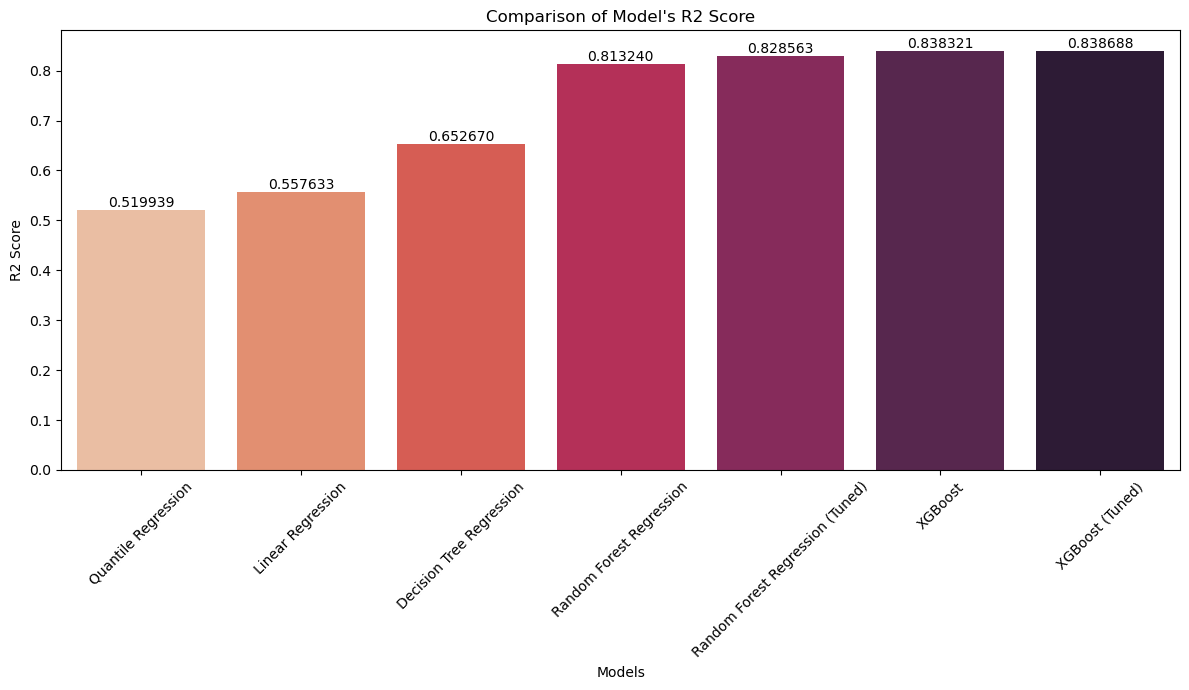

In [149]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=evaluation_metrics['Model'], y=evaluation_metrics['R2 Score'], palette='rocket_r')
# Add the R2 Score values on top of the bars
for index, value in enumerate(evaluation_metrics['R2 Score']):
     ax.text(index, value, f'{value:.6f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title("Comparison of Model's R2 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

XGBoost (tuned) has the highest R2 score and has the least mean absolute error which shows that model is performing well on the test data.

XGBoost (tuned) has the highest R2 score and has the least mean absolute error which shows that model is performing well on the test data.

**Predicted vs Actual Median House Values using XGBoost (Tuned)**

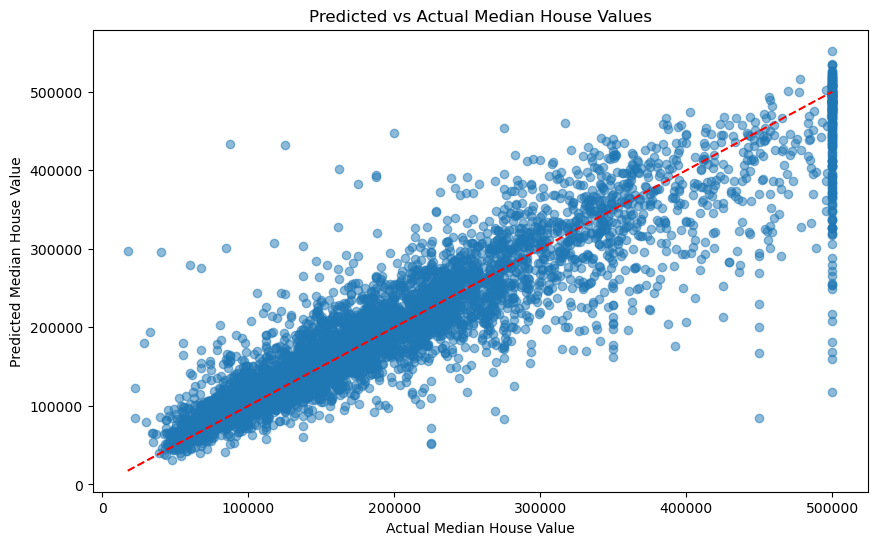

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgboost_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual Median House Values')
plt.show()

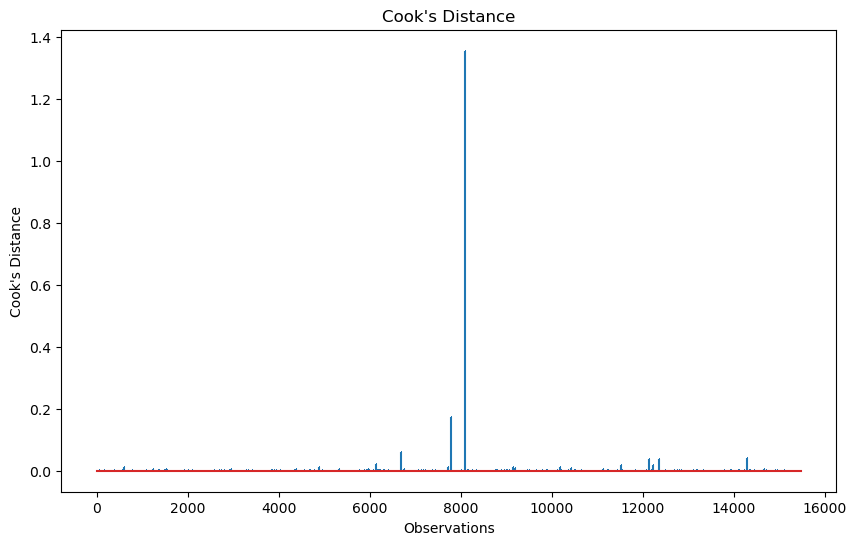

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Log transformation on 'median_income'
data['log_median_income'] = np.log(data['median_income'])

# Update feature list
X = df.drop(["median_house_value"], axis=1)
X['log_median_income'] = np.log(X['median_income'])
X = X.drop('median_income', axis=1)

# Add a constant term
X = sm.add_constant(X)

# Log-transform the target variable
data['log_median_house_value'] = np.log(data['median_house_value'])
y = data['log_median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the linear regression model
linear_model = sm.OLS(y_train, X_train).fit()

# Calculate Cook's distance
influence = linear_model.get_influence()
cooks_distance, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance")
plt.xlabel("Observations")
plt.ylabel("Cook's Distance")
plt.show()




In [51]:
# Get linear regression coefficients
linear_coefs = linear_model.params
linear_conf_int = linear_model.conf_int()
linear_conf_int.columns = ['beta_lower', 'beta_upper']

# Combine coefficients and confidence intervals
linear_regression_results = pd.concat([linear_coefs, linear_conf_int], axis=1).reset_index()
linear_regression_results.columns = ['feature', 'beta', 'beta_lower', 'beta_upper']

def run_quantile_regression(X, y, quantile):
    qr_model = sm.QuantReg(y, X).fit(q=quantile)
    coefs = pd.DataFrame({
        'feature': X.columns,
        'beta': qr_model.params,
        'beta_lower': qr_model.conf_int()[0],
        'beta_upper': qr_model.conf_int()[1],
        'quantile': quantile
    })
    return coefs

# List of quantiles to run the regression for
quantiles = [0.1, 0.5, 0.9]

# Combine results for all quantiles
all_quantile_results = pd.DataFrame()

for q in quantiles:
    qr_coefs = run_quantile_regression(X, y, q)
    all_quantile_results = pd.concat([all_quantile_results, qr_coefs], axis=0)

# Reset index for better readability
all_quantile_results.reset_index(drop=True, inplace=True)

# Display the results


# Display results
print("Linear Regression Results:")
print(linear_regression_results)

print("\nQuantile Regression Results at 0.5 Quantile:")
print(all_quantile_results)

Linear Regression Results:
                       feature      beta  beta_lower  beta_upper
0                        const -1.718845   -2.499389   -0.938301
1                    longitude -0.154717   -0.166020   -0.143414
2                     latitude -0.148657   -0.159821   -0.137493
3           housing_median_age  0.002233    0.001774    0.002691
4          rooms_per_household -0.017525   -0.023267   -0.011784
5       bedrooms_per_household  0.169629    0.140750    0.198507
6     population_per_household -0.001074   -0.001517   -0.000631
7      ocean_proximity_1Hocean -0.354077   -0.550165   -0.157990
8       ocean_proximity_INLAND -0.655599   -0.840345   -0.470853
9     ocean_proximity_NEAR BAY -0.354827   -0.555847   -0.153807
10  ocean_proximity_NEAR OCEAN -0.354342   -0.554504   -0.154180
11           log_median_income  0.722581    0.705130    0.740032

Quantile Regression Results for different Quantile:
                       feature      beta  beta_lower  beta_upper  quantile


In [52]:
# Intersection of Linear and Quantile Regression Coefficients
intersection = pd.merge(linear_regression_results, quantile_regression_results, on='feature', suffixes=('_linear', '_quantile'))
print("\nIntersection of Coefficients:")
print(intersection[['feature', 'beta_linear', 'beta_quantile', 'beta_lower_linear', 'beta_upper_linear', 'beta_lower_quantile', 'beta_upper_quantile']])


NameError: name 'quantile_regression_results' is not defined

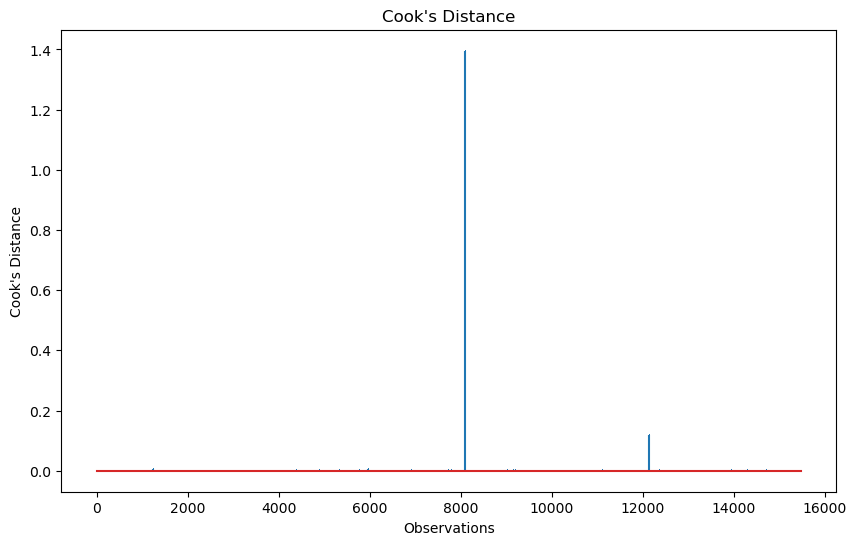


Intersection of Coefficients:
                    feature   beta_linear  beta_quantile  beta_lower_linear  \
0                     const  7.904788e-14  -2.330153e-09       5.438463e-14   
1                 longitude  1.457168e-15  -2.829993e-11       1.148531e-15   
2                  latitude  1.193490e-15  -2.417279e-11       8.962733e-16   
3        housing_median_age -5.074066e-17  -3.115143e-13      -6.629797e-17   
4           ocean_proximity  8.870398e-16   3.997583e-16       8.870398e-16   
5       rooms_per_household  3.053113e-16   2.596409e-12       1.085448e-16   
6    bedrooms_per_household -8.326673e-16  -3.286337e-12      -1.825652e-15   
7  population_per_household  2.656295e-17   1.928866e-14       1.123256e-17   
8         log_median_income -3.080869e-15  -4.050771e-12      -3.799735e-15   
9    log_median_house_value  1.000000e+00   1.000000e+00       1.000000e+00   

   beta_upper_linear  beta_lower_quantile  beta_upper_quantile  
0       1.037111e-13        -2.411

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing the dataset
# Log transformation on 'median_income'
data['log_median_income'] = np.log(data['median_income'])

# Update feature list
X = data.drop(["median_house_value"], axis=1)
X['log_median_income'] = np.log(X['median_income'])
X = X.drop('median_income', axis=1)

# Add a constant term
X = sm.add_constant(X)

# Log-transform the target variable
data['log_median_house_value'] = np.log(data['median_house_value'])
y = data['log_median_house_value']

# Ensure all data is numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, forcing any problematic data to NaN
X = X.fillna(0)  # Fill any NaN values with 0 or an appropriate value

# Also ensure y is numeric
y = pd.to_numeric(y, errors='coerce')
y = y.fillna(0)  # Handle missing values in the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the linear regression model
linear_model = sm.OLS(y_train, X_train).fit()

# Calculate Cook's distance
influence = linear_model.get_influence()
cooks_distance, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance")
plt.xlabel("Observations")
plt.ylabel("Cook's Distance")
plt.show()

# Get linear regression coefficients
linear_coefs = linear_model.params
linear_conf_int = linear_model.conf_int()
linear_conf_int.columns = ['beta_lower', 'beta_upper']

# Combine coefficients and confidence intervals
linear_regression_results = pd.concat([linear_coefs, linear_conf_int], axis=1).reset_index()
linear_regression_results.columns = ['feature', 'beta_linear', 'beta_lower_linear', 'beta_upper_linear']

def run_quantile_regression(X, y, quantile):
    qr_model = sm.QuantReg(y, X).fit(q=quantile)
    coefs = pd.DataFrame({
        'feature': X.columns,
        'beta_quantile': qr_model.params,
        'beta_lower_quantile': qr_model.conf_int()[0],
        'beta_upper_quantile': qr_model.conf_int()[1],
    })
    return coefs

# Running quantile regression for 0.5 quantile (median)
quantile_regression_results = run_quantile_regression(X, y, 0.5)

# Intersection of Linear and Quantile Regression Coefficients
intersection = pd.merge(linear_regression_results, quantile_regression_results, on='feature', suffixes=('_linear', '_quantile'))

# Display the results
print("\nIntersection of Coefficients:")
print(intersection[['feature', 'beta_linear', 'beta_quantile', 'beta_lower_linear', 'beta_upper_linear', 'beta_lower_quantile', 'beta_upper_quantile']])
